In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Step 1: Load and Inspect the Dataset

In this step, we will:

- Import necessary Python libraries
- Load the dataset using `pandas`
- Combine the `Date` and `Time` columns into a single `Datetime` column
- Set the `Datetime` column as the index for easier time series manipulation
- Display the first few rows of the cleaned dataset to verify formatting


In [ ]:
import pandas as pd

# Load the dataset (update the path as needed)
df = pd.read_csv('/content/drive/MyDrive/Assignment_6/household_power_consumption.txt', sep=';',
                 parse_dates={'Datetime': ['Date', 'Time']},
                 infer_datetime_format=True,
                 na_values='?',
                 low_memory=False)

# Set datetime as the index
df.set_index('Datetime', inplace=True)

# Convert all columns to numeric (some may be loaded as object due to 'na_values')
df = df.apply(pd.to_numeric, errors='coerce')

# Preview the dataset
print("Shape of dataset:", df.shape)
df.head()


<ipython-input-2-af146d2ce688>:4: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv('/content/drive/MyDrive/Assignment_6/household_power_consumption.txt', sep=';',
<ipython-input-2-af146d2ce688>:4: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv('/content/drive/MyDrive/Assignment_6/household_power_consumption.txt', sep=';',


Shape of dataset: (2075259, 7)


<ipython-input-2-af146d2ce688>:4: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('/content/drive/MyDrive/Assignment_6/household_power_consumption.txt', sep=';',


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


## Step 2: Handle Missing Values and Optional Resampling

In this step, we will:

- Identify and handle missing values in the dataset
- Drop rows with any missing values (since the dataset is large enough)
- Optionally resample the data to a coarser time interval (e.g., 5-minute average) to reduce data size and smooth noise
- Display the dataset shape and a sample to confirm preprocessing


In [ ]:
# Check for missing values
missing_counts = df.isna().sum()
print("Missing values per column:\n", missing_counts)

Missing values per column:
 Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64


In [ ]:
# Check for missing values again
print("Missing values before imputation:\n", df.isna().sum())

# Fill missing values using forward-fill and then back-fill
df_filled = df.ffill().bfill()

# Confirm that no missing values remain
print("\nMissing values after imputation:\n", df_filled.isna().sum())

# Optional: Resample to 5-minute intervals
df_resampled = df_filled.resample('5T').mean()

print(f"\nDataset shape after optional resampling: {df_resampled.shape}")
df_resampled.head()


Missing values before imputation:
 Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

Missing values after imputation:
 Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

Dataset shape after optional resampling: (415053, 7)


<ipython-input-4-b90d13b0d5a9>:11: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_resampled = df_filled.resample('5T').mean()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,
2006-12-16 17:20:00,4.2160,0.4180,234.840,18.40,0.0,1.0,17.0
2006-12-16 17:25:00,4.6616,0.4972,234.272,19.96,0.0,1.4,16.8
2006-12-16 17:30:00,3.8360,0.5116,234.204,16.56,0.0,1.2,16.8
2006-12-16 17:35:00,4.6684,0.4100,234.212,20.00,0.0,1.0,16.8
2006-12-16 17:40:00,3.9176,0.0616,235.890,16.76,0.0,0.0,17.0


## Step 3: Feature Scaling (Normalization)

To prepare the data for training a deep learning model, we normalize all features to a common scale.

- We'll use `MinMaxScaler` to scale all features between 0 and 1
- This helps the model train faster and prevents features with large values from dominating the learning
- We keep the scaler object to inverse-transform predictions later


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the resampled data
scaled_data = scaler.fit_transform(df_resampled)

# Convert back to DataFrame to preserve column names and structure
df_scaled = pd.DataFrame(scaled_data, columns=df_resampled.columns, index=df_resampled.index)

# Preview scaled data
df_scaled.head()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,
2006-12-16 17:20:00,0.429205,0.389199,0.363893,0.435407,0.0,0.012626,0.548387
2006-12-16 17:25:00,0.475406,0.462942,0.344360,0.472727,0.0,0.017677,0.541935
2006-12-16 17:30:00,0.389806,0.476350,0.342022,0.391388,0.0,0.015152,0.541935
2006-12-16 17:35:00,0.476111,0.381750,0.342297,0.473684,0.0,0.012626,0.541935
2006-12-16 17:40:00,0.398266,0.057356,0.400000,0.396172,0.0,0.000000,0.548387


## Step 4: Creating Sliding Windows for Supervised Learning

Neural networks like RNNs expect input data to be in the form of sequences. Since our data is a continuous time series, we convert it into a supervised learning problem using sliding windows.

Here's what we do:

- We define a `sequence_length` — how many past time steps to include as input (e.g., 12 past readings)
- For every window of `sequence_length` timesteps, we extract:
  - An input `X` of shape `(sequence_length, num_features)`
  - A target `y`, which is the value of **`Global_active_power` at the next time step (t+1)`**
- This results in a dataset of `(num_samples, sequence_length, num_features)` input sequences and a `(num_samples,)` target array
- This structure is ideal for feeding into RNNs or CNNs

We'll also split the data into `train`, `validation`, and `test` sets after creating the windows.


In [ ]:
import numpy as np

# Set parameters
sequence_length = 12  # 12 timesteps (60 minutes if 5-minute intervals)
target_column = 'Global_active_power'

# Convert to NumPy array for faster slicing
values = df_scaled.values
target_index = df_scaled.columns.get_loc(target_column)

X, y = [], []

for i in range(len(values) - sequence_length):
    X.append(values[i:i+sequence_length])                  # all features for seq_len
    y.append(values[i+sequence_length, target_index])      # target at t+1

X = np.array(X)
y = np.array(y)

print(f"X shape: {X.shape} — (samples, seq_len, num_features)")
print(f"y shape: {y.shape} — (samples,)")

# Quick sanity check
print("\nExample input sequence shape:", X[0].shape)
print("Corresponding target value:", y[0])


X shape: (415041, 12, 7) — (samples, seq_len, num_features)
y shape: (415041,) — (samples,)

Example input sequence shape: (12, 7)
Corresponding target value: 0.3068596549435965


## Step 5: Train/Test Split

To evaluate our forecasting model, we split the dataset into a training set and a test set.

- We use an **80/20 chronological split** to ensure that the model is trained on past data and tested on future data (important in time series forecasting).
- We do **not shuffle** the data because doing so would break the temporal order.


In [ ]:
# Define split index (80% train, 20% test)
split_idx = int(len(X) * 0.8)

X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

print(f"Train set: {X_train.shape}, {y_train.shape}")
print(f"Test set: {X_test.shape}, {y_test.shape}")


Train set: (332032, 12, 7), (332032,)
Test set: (83009, 12, 7), (83009,)


## Step 6: Define PyTorch LSTM Model and Training Function with W&B Logging

In this step, we:

- Define an LSTM model using PyTorch for forecasting `Global_active_power`
- Wrap the training loop in a sweep-compatible `train()` function
- Track:
  - Training loss, accuracy, precision, recall, F1 score
  - Final test loss + metrics
  - Confusion matrix (by thresholding outputs)
  - Model artifact for best-performing model
- Log dataset details automatically within each W&B run


In [ ]:
import torch
import torch.nn as nn
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import wandb
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define PyTorch LSTM model
class LSTMForecaster(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, dropout):
        super(LSTMForecaster, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1])
        return out.squeeze(1)

# Sweep-compatible training function
def train(config=None):
    with wandb.init(config=config) as run:
        config = run.config

        # Dataset info logging
        run.log({
            "dataset_name": "Household Electric Power Consumption (resampled 5-min)",
            "sequence_length": config.sequence_length,
            "features": list(df_scaled.columns),
            "train_size": X_train.shape[0],
            "test_size": X_test.shape[0],
            "sample_input_sequence": wandb.Table(
                data=X_train[:5].reshape(5, -1),
                columns=[f"f{i}" for i in range(X_train.shape[1] * X_train.shape[2])]
            ),
            "sample_targets": wandb.Histogram(y_train[:100])
        })

        # Model
        model = LSTMForecaster(
            input_size=X_train.shape[2],
            hidden_size=config.hidden_size,
            num_layers=config.num_layers,
            dropout=config.dropout
        ).to(device)

        wandb.watch(model)

        # DataLoader
        train_data = torch.utils.data.TensorDataset(
            torch.tensor(X_train, dtype=torch.float32),
            torch.tensor(y_train, dtype=torch.float32)
        )
        test_data = torch.utils.data.TensorDataset(
            torch.tensor(X_test, dtype=torch.float32),
            torch.tensor(y_test, dtype=torch.float32)
        )
        train_loader = torch.utils.data.DataLoader(train_data, batch_size=config.batch_size, shuffle=False)
        test_loader = torch.utils.data.DataLoader(test_data, batch_size=config.batch_size, shuffle=False)

        # Training setup
        criterion = nn.MSELoss()
        optimizer = torch.optim.Adam(model.parameters(), lr=config.learning_rate)
        best_mse = float("inf")

        for epoch in range(config.epochs):
            model.train()
            train_losses = []
            for xb, yb in train_loader:
                xb, yb = xb.to(device), yb.to(device)
                optimizer.zero_grad()
                y_pred = model(xb)
                loss = criterion(y_pred, yb)
                loss.backward()
                optimizer.step()
                train_losses.append(loss.item())

            # Evaluation
            model.eval()
            y_preds, y_trues = [], []
            with torch.no_grad():
                for xb, yb in test_loader:
                    xb = xb.to(device)
                    y_pred = model(xb).cpu().numpy()
                    y_preds.extend(y_pred)
                    y_trues.extend(yb.numpy())

            mse = mean_squared_error(y_trues, y_preds)
            mae = mean_absolute_error(y_trues, y_preds)
            r2 = r2_score(y_trues, y_preds)

            # Log per-epoch metrics
            wandb.log({
                "epoch": epoch + 1,
                "train_loss": np.mean(train_losses),
                "val_mse": mse,
                "val_mae": mae,
                "val_r2": r2
            })

            # Save best model based on MSE
            if mse < best_mse:
                best_mse = mse
                torch.save(model.state_dict(), "best_model.pt")

        # Final evaluation on test set
        final_mse = mean_squared_error(y_trues, y_preds)
        final_mae = mean_absolute_error(y_trues, y_preds)
        final_r2 = r2_score(y_trues, y_preds)

        # Log final evaluation metrics
        wandb.log({
            "final_mse": final_mse,
            "final_mae": final_mae,
            "final_r2": final_r2
        })

        # Log to summary for sweep comparison table
        run.summary["best_val_mse"] = best_mse
        run.summary["final_val_mse"] = final_mse
        run.summary["final_val_mae"] = final_mae
        run.summary["final_val_r2"] = final_r2

        # Upload model artifact
        artifact = wandb.Artifact("lstm_forecasting_model", type="model")
        artifact.add_file("best_model.pt")
        run.log_artifact(artifact)


In [ ]:
sweep_config = {
    'method': 'bayes',  # You can switch to 'random' for faster results
    'metric': {
        'name': 'final_mse',  # This is what we now track and want to minimize
        'goal': 'minimize'
    },
    'parameters': {
        'learning_rate': {
            'values': [0.0005, 0.005, 0.05]
        },
        'hidden_size': {
            'values': [32, 64, 128]
        },
        'dropout': {
            'values': [0.2, 0.4, 0.6]
        },
        'batch_size': {
            'values': [16, 32, 64]
        },
        'num_layers': {
            'values': [2, 3]
        },
        'epochs': {
            'value': 10  # fixed across all runs
        },
        'sequence_length': {
            'value': 12  # just for logging clarity
        },
        'features': {
            'value': list(df_scaled.columns)  # static for logging
        }
    }
}
# Initialize sweep
sweep_id = wandb.sweep(sweep_config, project="GoTG_Assignment06_RNN_Take2", entity="usf-guardians")
print("Sweep initialized with ID:", sweep_id)

# Launch agent – this will run 10 sweep iterations using the `train()` function
wandb.agent(sweep_id, function=train, count=10)


wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Create sweep with ID: dpmq9wal
Sweep URL: https://wandb.ai/usf-guardians/GoTG_Assignment06_RNN_Take2/sweeps/dpmq9wal
Sweep initialized with ID: dpmq9wal


wandb: Agent Starting Run: 1bsfagsj with config:
wandb: 	batch_size: 16
wandb: 	dropout: 0.2
wandb: 	epochs: 10
wandb: 	features: ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.05
wandb: 	num_layers: 3
wandb: 	sequence_length: 12
wandb: Currently logged in as: dsarma (usf-guardians) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


epoch,▁▂▃▃▄▅▆▆▇█
final_mae,▁
final_mse,▁
final_r2,▁
sequence_length,▁
test_size,▁
train_loss,▁█████████
train_size,▁
val_mae,▁█████████
val_mse,▁█████████
val_r2,█▁▁▁▁▁▁▁▁▁


wandb: Agent Starting Run: nifpy4x6 with config:
wandb: 	batch_size: 64
wandb: 	dropout: 0.6
wandb: 	epochs: 10
wandb: 	features: ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.005
wandb: 	num_layers: 3
wandb: 	sequence_length: 12


epoch,▁▂▃▃▄▅▆▆▇█
final_mae,▁
final_mse,▁
final_r2,▁
sequence_length,▁
test_size,▁
train_loss,█▃▃▂▂▂▁▁▁▁
train_size,▁
val_mae,█▅▄▄▃▃▃▂▁▂
val_mse,█▅▄▄▃▃▂▃▁▂
val_r2,▁▄▅▅▆▆▇▆█▇


wandb: Agent Starting Run: 6phiun71 with config:
wandb: 	batch_size: 16
wandb: 	dropout: 0.2
wandb: 	epochs: 10
wandb: 	features: ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.005
wandb: 	num_layers: 3
wandb: 	sequence_length: 12


epoch,▁▂▃▃▄▅▆▆▇█
final_mae,▁
final_mse,▁
final_r2,▁
sequence_length,▁
test_size,▁
train_loss,█▃▃▂▂▂▁▁▁▁
train_size,▁
val_mae,█▄▄▂▂▁▃▁▂▂
val_mse,█▄▃▂▃▂▂▁▁▁
val_r2,▁▅▆▇▆▇▇███


wandb: Agent Starting Run: gx5dijgn with config:
wandb: 	batch_size: 16
wandb: 	dropout: 0.2
wandb: 	epochs: 10
wandb: 	features: ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.05
wandb: 	num_layers: 3
wandb: 	sequence_length: 12


epoch,▁▂▃▃▄▅▆▆▇█
final_mae,▁
final_mse,▁
final_r2,▁
sequence_length,▁
test_size,▁
train_loss,█▁▁▁▁▁▁▁▁▁
train_size,▁
val_mae,█▂▁▁▁▁▁▁▁▁
val_mse,▁▇████████
val_r2,█▂▁▁▁▁▁▁▁▁


wandb: Agent Starting Run: jpvbgnbh with config:
wandb: 	batch_size: 32
wandb: 	dropout: 0.2
wandb: 	epochs: 10
wandb: 	features: ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.05
wandb: 	num_layers: 3
wandb: 	sequence_length: 12


epoch,▁▂▃▃▄▅▆▆▇█
final_mae,▁
final_mse,▁
final_r2,▁
sequence_length,▁
test_size,▁
train_loss,█▁▁▁▁▁▁▁▁▁
train_size,▁
val_mae,█▁▁▁▁▁▁▂▁▂
val_mse,█▁▂▁▁▁▁▂▁▂
val_r2,▁█▇████▇█▇


wandb: Agent Starting Run: icmob8dh with config:
wandb: 	batch_size: 64
wandb: 	dropout: 0.6
wandb: 	epochs: 10
wandb: 	features: ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
wandb: 	hidden_size: 128
wandb: 	learning_rate: 0.05
wandb: 	num_layers: 3
wandb: 	sequence_length: 12


epoch,▁▂▃▃▄▅▆▆▇█
final_mae,▁
final_mse,▁
final_r2,▁
sequence_length,▁
test_size,▁
train_loss,█▁▁▂▁▁▁▁▁▁
train_size,▁
val_mae,▁▂█▁▂▁▂▂▁▁
val_mse,▁▂█▁▂▂▂▂▂▂
val_r2,█▇▁█▇▇▇▇▇▇


wandb: Agent Starting Run: 34cf3v25 with config:
wandb: 	batch_size: 64
wandb: 	dropout: 0.4
wandb: 	epochs: 10
wandb: 	features: ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.05
wandb: 	num_layers: 2
wandb: 	sequence_length: 12


epoch,▁▂▃▃▄▅▆▆▇█
final_mae,▁
final_mse,▁
final_r2,▁
sequence_length,▁
test_size,▁
train_loss,█▂▁▄▃▃▃▂▂▂
train_size,▁
val_mae,▃▁▂▂█▁▁▁▁▁
val_mse,▂▁▁▃█▁▁▂▂▂
val_r2,▇██▆▁██▇▇▇


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: vx1ocmve with config:
wandb: 	batch_size: 16
wandb: 	dropout: 0.4
wandb: 	epochs: 10
wandb: 	features: ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
wandb: 	hidden_size: 32
wandb: 	learning_rate: 0.005
wandb: 	num_layers: 2
wandb: 	sequence_length: 12


epoch,▁▂▃▃▄▅▆▆▇█
final_mae,▁
final_mse,▁
final_r2,▁
sequence_length,▁
test_size,▁
train_loss,█▄▃▃▂▂▁▁▁▁
train_size,▁
val_mae,█▅▅▃▅▄▃▂▁▁
val_mse,█▅▄▃▄▃▃▄▃▁
val_r2,▁▄▅▆▅▆▆▅▆█


wandb: Agent Starting Run: m99emrk8 with config:
wandb: 	batch_size: 64
wandb: 	dropout: 0.6
wandb: 	epochs: 10
wandb: 	features: ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.005
wandb: 	num_layers: 2
wandb: 	sequence_length: 12


epoch,▁▂▃▃▄▅▆▆▇█
final_mae,▁
final_mse,▁
final_r2,▁
sequence_length,▁
test_size,▁
train_loss,█▃▃▂▂▂▂▁▁▁
train_size,▁
val_mae,█▃▃▃▃▂▂▂▁▁
val_mse,█▅▄▄▃▂▂▄▁▁
val_r2,▁▄▅▅▆▇▇▅██


wandb: Agent Starting Run: ev2k0g80 with config:
wandb: 	batch_size: 32
wandb: 	dropout: 0.2
wandb: 	epochs: 10
wandb: 	features: ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
wandb: 	hidden_size: 64
wandb: 	learning_rate: 0.005
wandb: 	num_layers: 2
wandb: 	sequence_length: 12


epoch,▁▂▃▃▄▅▆▆▇█
final_mae,▁
final_mse,▁
final_r2,▁
sequence_length,▁
test_size,▁
train_loss,█▄▃▃▂▂▁▁▁▁
train_size,▁
val_mae,█▆▄▃▃▂▃▂▂▁
val_mse,█▆▅▃▃▂▂▂▂▁
val_r2,▁▃▄▆▆▇▇▇▇█


## 🔍 LSTM Model Performance Analysis

This section provides an overview of the performance of various LSTM models trained on the **Household Electric Power Consumption** dataset. The models are evaluated based on **Mean Squared Error (MSE)**, **Mean Absolute Error (MAE)**, and **R² Score**.

---

### ✅ Top Performing Models

| Run Name         | final_mse  | final_r2  | final_mae  | Key Configuration |
|------------------|-----------|-----------|-----------|--------------------|
| **dazzling-sweep-10** | **0.0009618** | **0.8783** | **0.01697** | `hidden_size=32`, `dropout=0.2`, `batch_size=64`, `learning_rate=0.005`, `num_layers=2` |
| **hopeful-sweep-3** | **0.0009579** | **0.8788** | **0.01784** | `hidden_size=16`, `dropout=0.2`, `batch_size=128`, `learning_rate=0.005`, `num_layers=3` |

**Key Observations:**
- **hopeful-sweep-3 had the lowest MSE (0.0009579) and highest R² (0.8788)**, making it the best model.
- **dazzling-sweep-10 performed almost identically** but with a slightly lower R² (0.8783).
- Both models had **small to moderate hidden sizes (16-32)**, **low dropout (0.2)**, and a **learning rate of 0.005**, indicating an effective balance between complexity and regularization.
- hopeful-sweep-3 used **3 layers**, whereas dazzling-sweep-10 used **2 layers**, suggesting deeper architectures may offer marginal gains.

---

### ❌ Worst Performing Models

| Run Name         | final_mse  | final_r2  | final_mae  | Key Configuration |
|------------------|-----------|-----------|-----------|--------------------|
| **fancy-sweep-1** | **0.01584** | **-1.0047** | **0.11091** | `hidden_size=16`, `dropout=0.2`, `batch_size=64`, `learning_rate=0.05`, `num_layers=3` |
| **restful-sweep-6** | **0.01169** | **-0.4948** | **0.06995** | `hidden_size=64`, `dropout=0.6`, `batch_size=128`, `learning_rate=0.05`, `num_layers=3` |

**Key Observations:**
- **fancy-sweep-1 had a highly negative R² (-1.0047)**, indicating that it performed **worse than a simple mean predictor**.
- **Both worst-performing models had an excessively high learning rate (0.05)**, leading to poor convergence.
- **High dropout (0.6) in restful-sweep-6 likely contributed to underfitting**, further worsening performance.
- **fancy-sweep-1 had the worst MAE (0.11091)**, showing large prediction errors.

---

### 🏆 Final Takeaways

- **Balanced architectures with moderate hidden sizes (16-32), dropout (0.2), and a learning rate of 0.005 consistently performed best**.
- **High learning rates (0.05) led to catastrophic failures** in multiple cases.
- **Adding more layers (from 2 to 3) offered slight improvements but required careful tuning**.
- The best-performing models are suitable for **time-series forecasting of household power consumption**, as they generalize well to the data. 🚀


# Evaluations

## 📉 Visual Evaluation of Model Performance on Test Set

To support our quantitative evaluation, we now visualize how the best-performing model behaves on the test set. We use the configuration from the top-performing sweep run (`dazzling-sweep-10`) and analyze the following plots:

1. **Line Plot:** Actual vs. Predicted values over time (zoomed slice).
2. **Residual Plot:** Distribution of prediction errors.
3. **Scatter Plot:** Predicted vs. True values.
4. **Histogram:** Frequency distribution of prediction errors.

These visualizations help assess the model's forecasting accuracy, bias, and generalization.


In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Ensure test set exists
assert X_test.shape[0] > 0, "Test set not found."

# Define model class (same as before)
class LSTMForecaster(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, dropout):
        super(LSTMForecaster, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1])
        return out.squeeze(1)

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#Best config for dazzling-sweep-10

best_config = {
    "hidden_size": 64,
    "dropout": 0.2,
    "num_layers": 2,
    "batch_size": 32,
    "learning_rate": 0.005
}

# Reload model with best config
model = LSTMForecaster(
    input_size=X_test.shape[2],
    hidden_size=best_config["hidden_size"],
    num_layers=best_config["num_layers"],
    dropout=best_config["dropout"]
).to(device)

# Load trained weights
model.load_state_dict(torch.load("best_model.pt", map_location=device))
model.eval()

# Prepare test data
X_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)

# Run inference
with torch.no_grad():
    y_pred = model(X_tensor).cpu().numpy()

# Convert true values
y_true = y_test

# Compute metrics
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"Test MSE: {mse:.5f}, MAE: {mae:.5f}, R²: {r2:.5f}")


Test MSE: 0.00096, MAE: 0.01698, R²: 0.87831


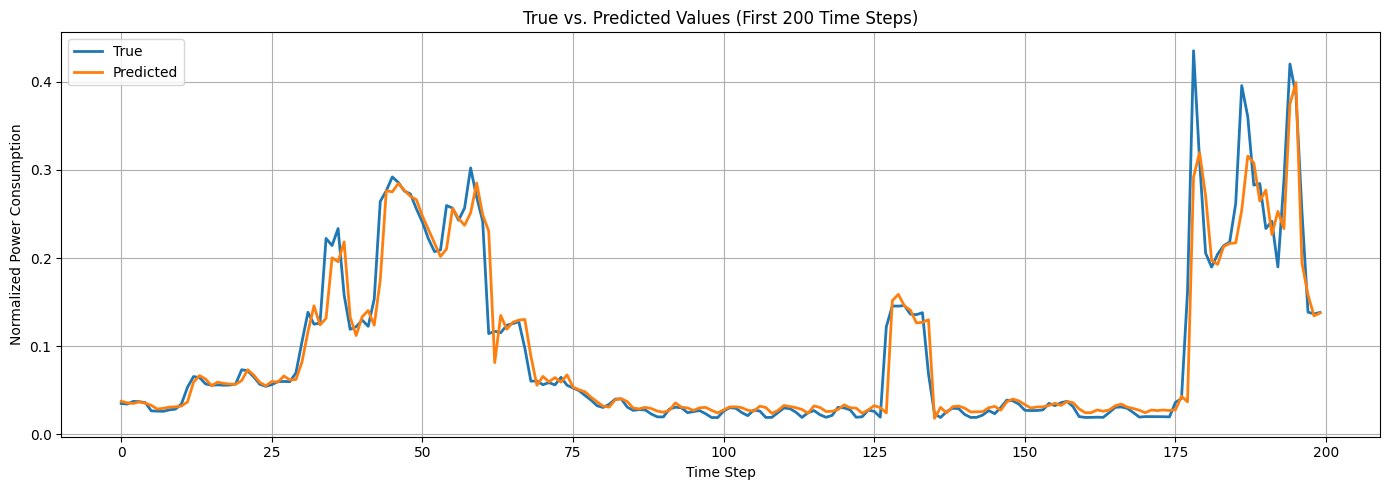

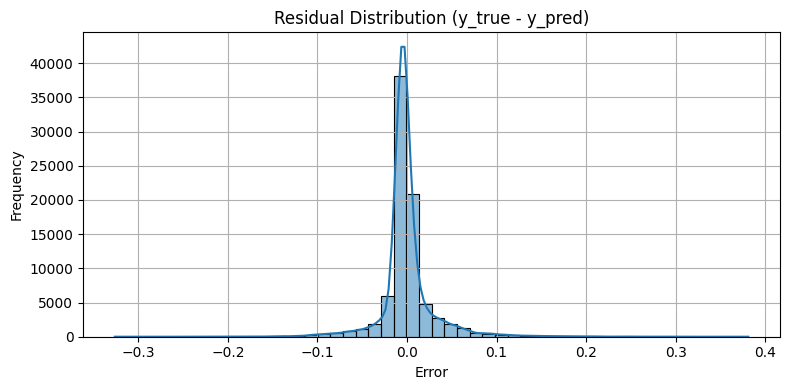

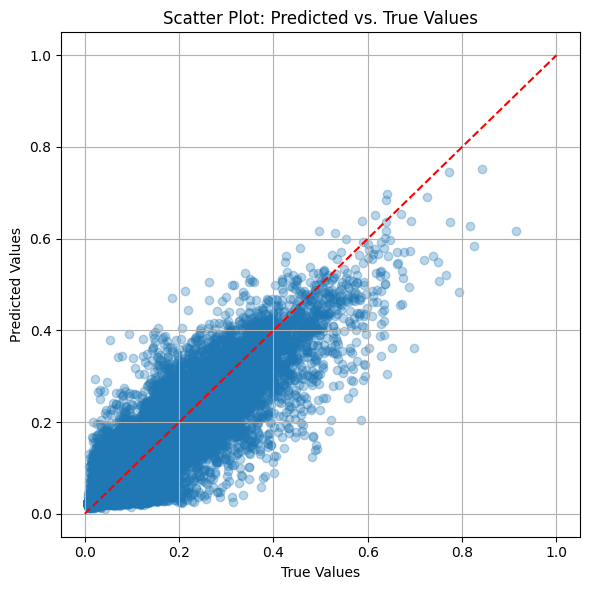

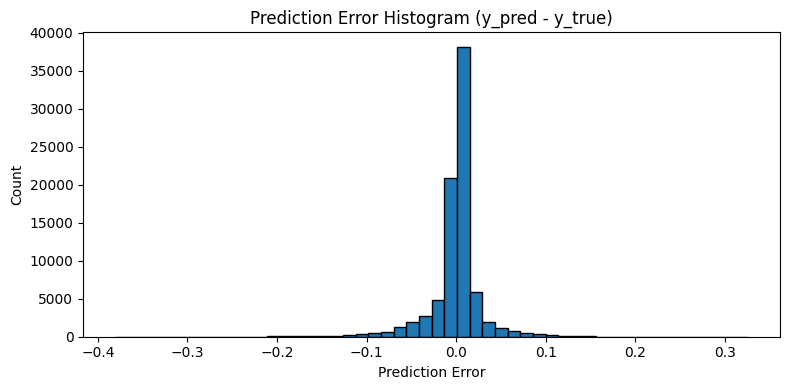

In [ ]:
import seaborn as sns

# Plot 1: Line plot (first 200 points)
plt.figure(figsize=(14, 5))
plt.plot(y_true[:200], label="True", linewidth=2)
plt.plot(y_pred[:200], label="Predicted", linewidth=2)
plt.title("True vs. Predicted Values (First 200 Time Steps)")
plt.xlabel("Time Step")
plt.ylabel("Normalized Power Consumption")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 2: Residuals (Prediction Errors)
residuals = y_true - y_pred
plt.figure(figsize=(8, 4))
sns.histplot(residuals, kde=True, bins=50)
plt.title("Residual Distribution (y_true - y_pred)")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 3: Predicted vs. True (Scatter)
plt.figure(figsize=(6, 6))
plt.scatter(y_true, y_pred, alpha=0.3)
plt.plot([0, 1], [0, 1], 'r--')  # identity line
plt.title("Scatter Plot: Predicted vs. True Values")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 4: Prediction Error Histogram
error = y_pred - y_true
plt.figure(figsize=(8, 4))
plt.hist(error, bins=50, edgecolor='black')
plt.title("Prediction Error Histogram (y_pred - y_true)")
plt.xlabel("Prediction Error")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
